In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Reading in the data as adult dataframe
amazon = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/amazon_toy_sample_clean.csv", encoding="ISO-8859-1")

#Verifying that we can see the data
amazon.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,uniq_id,product_name,manufacturer,price,number_available_in_stock,status,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews
0,dafc6b4ba4b4a3e7b4ff83402a196ae8,Dinosaur Eggs,Halsall,0.29,3,new,3,2,4.0,Figures & Playsets > Dinosaurs,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,Manufacturer's Description not available,Technical Details Item Weight82 g Product Dime...,Not available,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,None,Fascinating fun // 4.0 // 25 Nov. 2008 // By\n...
1,ba85fb9368114fce646379ed12750a5f,Neopets 4 Trading Card Fun Packs (2 Bonus Cards),Neopets,0.38,2,new,2,1,4.5,Hobbies > Trading Cards & Accessories > Packs ...,Unknown,Manufacturer's Description not available,Technical Details Item Weight454 g Product Dim...,Not available,Not available,None,Never Too Old // 4.0 // 6 Nov. 2013 // By\n ...
2,14e24c29ba38c2717754baa2638f242a,"Latex Assorted Water Balloons, Pack of 40",Unique Party,0.39,7,new,2,1,4.5,Party Supplies > Decorations > Balloons,http://www.amazon.co.uk/Latex-Cannonball | htt...,Colour Name:Assorted Bold | Size Name:Pack o...,Technical Details Item Weight222 g Product Dim...,Colour Name:Assorted Bold | Size Name:Pack o...,http://www.amazon.co.uk/Water-Bombs-Pack-100-A...,None,Great item // 4.0 // 27 Dec. 2015 // By\n \...
3,048d64d2ba61c23f6280663a7281ff19,iCarly Shopper Bag - Lilac and Pink,Trade Mark Collections,0.50,4,new,7,2,4.6,Sports Toys & Outdoor > Beach Toys > Airbeds &...,http://www.amazon.co.uk/iCarly-Large-Rectangle...,Manufacturer's Description The iCarly Shopping...,NaN,Manufacturer's Description The iCarly Shopping...,http://www.amazon.co.uk/Namco-Bandai-Icarly/dp...,None,Very good product // 5.0 // 26 Mar. 2014 // By...
4,7b72f597db5d74d35c4f91ef69708cf1,4 Packs of Mini Colouring Pencils (4 pencils i...,unisex party bag fillers,0.60,7,new,21,1,4.3,Arts & Crafts > Colouring Pencils,http://www.amazon.co.uk/12-Mini-Christmas-Colo...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,Technical Details Item Weight59 g Product Dime...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,http://www.amazon.co.uk/20-Packs-Wax-Crayons-P...,How many packs in the box. // I got four Mimi ...,Well made and presented // 4.0 // 6 April 2015...


In [2]:
amazon.dtypes

uniq_id                                         object
product_name                                    object
manufacturer                                    object
price                                          float64
number_available_in_stock                        int64
status                                          object
number_of_reviews                                int64
number_of_answered_questions                     int64
average_review_rating_of_5                     float64
amazon_category_and_sub_category                object
customers_who_bought_this_item_also_bought      object
description                                     object
product_information                             object
product_description                             object
items_customers_buy_after_viewing_this_item     object
customer_questions_and_answers                  object
customer_reviews                                object
dtype: object

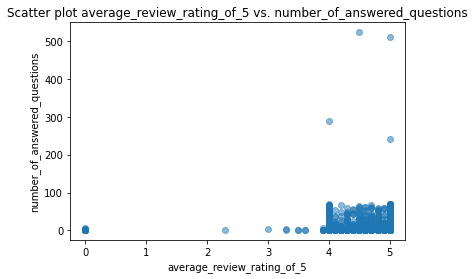

In [3]:
plt.scatter(amazon['average_review_rating_of_5'], amazon['number_of_answered_questions'], alpha=0.5)
plt.title('Scatter plot average_review_rating_of_5 vs. number_of_answered_questions')
plt.xlabel('average_review_rating_of_5')
plt.ylabel('number_of_answered_questions')
plt.show()

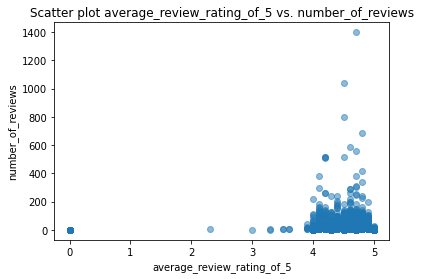

In [4]:
plt.scatter(amazon['average_review_rating_of_5'], amazon['number_of_reviews'], alpha=0.5)
plt.title('Scatter plot average_review_rating_of_5 vs. number_of_reviews')
plt.xlabel('average_review_rating_of_5')
plt.ylabel('number_of_reviews')
plt.show()

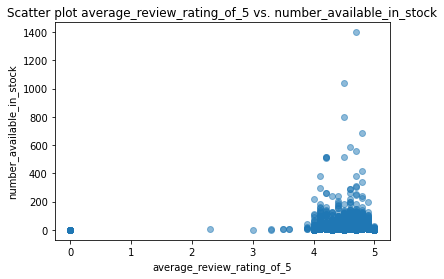

In [5]:
plt.scatter(amazon['average_review_rating_of_5'], amazon['number_of_reviews'], alpha=0.5)
plt.title('Scatter plot average_review_rating_of_5 vs. number_available_in_stock')
plt.xlabel('average_review_rating_of_5')
plt.ylabel('number_available_in_stock')
plt.show()

In [6]:
amazon.corr()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating_of_5
price,1.000000,-0.018077,-0.024214,-0.005956,0.013431
number_available_in_stock,-0.018077,1.000000,0.216765,-0.008131,-0.010505
number_of_reviews,-0.024214,0.216765,1.000000,0.020981,-0.090466
number_of_answered_questions,-0.005956,-0.008131,0.020981,1.000000,0.001997
average_review_rating_of_5,0.013431,-0.010505,-0.090466,0.001997,1.000000


In [11]:
X1 = amazon[['number_of_answered_questions','number_of_reviews','number_available_in_stock']]
y1 = amazon['average_review_rating_of_5']
X1 = sm.add_constant(X1)
amazon.mod1 = sm.OLS(y1, X1).fit()  ## sm.OLS(output, i.e. dependent variable, input, i.e. independent variable)
amazon.mod1_summary = amazon.mod1.summary()
print(amazon.mod1_summary)

                                OLS Regression Results                                
Dep. Variable:     average_review_rating_of_5   R-squared:                       0.008
Model:                                    OLS   Adj. R-squared:                  0.008
Method:                         Least Squares   F-statistic:                     17.64
Date:                        Sat, 18 Jun 2022   Prob (F-statistic):           2.13e-11
Time:                                04:22:27   Log-Likelihood:                -3581.5
No. Observations:                        6336   AIC:                             7171.
Df Residuals:                            6332   BIC:                             7198.
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [7]:
X = amazon['average_review_rating_of_5']
y = amazon['number_of_answered_questions']
X = sm.add_constant(X)
amazon.mod1 = sm.OLS(y, X).fit()  ## sm.OLS(output, i.e. dependent variable, input, i.e. independent variable)
amazon.mod1_summary = amazon.mod1.summary()
print(amazon.mod1_summary)

                                 OLS Regression Results                                 
Dep. Variable:     number_of_answered_questions   R-squared:                       0.000
Model:                                      OLS   Adj. R-squared:                 -0.000
Method:                           Least Squares   F-statistic:                   0.02526
Date:                          Sat, 18 Jun 2022   Prob (F-statistic):              0.874
Time:                                  04:14:58   Log-Likelihood:                -25442.
No. Observations:                          6336   AIC:                         5.089e+04
Df Residuals:                              6334   BIC:                         5.090e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X = amazon['average_review_rating_of_5']
y = amazon['price']
X = sm.add_constant(X)
amazon.mod1 = sm.OLS(y, X).fit()  ## sm.OLS(output, i.e. dependent variable, input, i.e. independent variable)
amazon.mod1_summary = amazon.mod1.summary()
print(amazon.mod1_summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.143
Date:                Fri, 17 Jun 2022   Prob (F-statistic):              0.285
Time:                        19:17:27   Log-Likelihood:                -33287.
No. Observations:                6336   AIC:                         6.658e+04
Df Residuals:                    6334   BIC:                         6.659e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X = amazon['average_review_rating_of_5']
y = amazon['number_of_reviews']
X = sm.add_constant(X)
amazon.mod1 = sm.OLS(y, X).fit()  ## sm.OLS(output, i.e. dependent variable, input, i.e. independent variable)
amazon.mod1_summary = amazon.mod1.summary()
print(amazon.mod1_summary)

                            OLS Regression Results                            
Dep. Variable:      number_of_reviews   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     52.27
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           5.42e-13
Time:                        19:17:31   Log-Likelihood:                -32224.
No. Observations:                6336   AIC:                         6.445e+04
Df Residuals:                    6334   BIC:                         6.446e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print('Parameters: ', amazon.mod1.params)
print('R2: ', amazon.mod1.rsquared)

Parameters:  const                         13.400974
average_review_rating_of_5     1.453773
dtype: float64
R2:  0.00018040239456351692


In [ ]:
predictions = amazon.mod1.predict(X) # Here, you'll see the CALCULATED values with the formula
predictions

0       19.216067
1       19.942953
2       19.942953
3       20.088331
4       19.652199
          ...    
6331    18.198426
6332    20.669840
6333    20.669840
6334    20.669840
6335    19.216067
Length: 6336, dtype: float64

In [ ]:
X = amazon[['price','number_of_answered_questions','number_of_reviews']] # Now we have values from three different independent attributes stored in X
y = amazon['average_review_rating_of_5'] # This is, again, our dependent attribute
print(X) # This is the content of our X variable

        price  number_of_answered_questions  number_of_reviews
0        0.29                             2                  3
1        0.38                             1                  2
2        0.39                             1                  2
3        0.50                             2                  7
4        0.60                             1                 21
...       ...                           ...                ...
6331   439.95                             3                  9
6332   447.99                             3                  1
6333   719.95                             1                  1
6334   995.11                            19                  4
6335  2439.92                             1                  1

[6336 rows x 3 columns]


In [ ]:
lm = linear_model.LinearRegression() # Here, we are using the linear_model subpackage from scikit-learn that we imported above
model = lm.fit(X,y) # And here, we are building

In [ ]:
lm.score(X,y)

0.008326162044344776

In [ ]:
lm.coef_

array([ 0.00010411,  0.00012615, -0.00098255])

In [ ]:
lm.intercept_

4.694645761442997

In [ ]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6336 entries, 0 to 6335
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      6336 non-null   object 
 1   product_name                                 6336 non-null   object 
 2   manufacturer                                 6336 non-null   object 
 3   price                                        6336 non-null   float64
 4   number_available_in_stock                    6336 non-null   int64  
 5   status                                       6336 non-null   object 
 6   number_of_reviews                            6336 non-null   int64  
 7   number_of_answered_questions                 6336 non-null   int64  
 8   average_review_rating_of_5                   6336 non-null   float64
 9   amazon_category_and_sub_category             6336 non-null   object 
 10  

In [ ]:
amazon2 = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/amazon_toy_sample_clean.csv", encoding="ISO-8859-1")
amazon2.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,status,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews
0,dafc6b4ba4b4a3e7b4ff83402a196ae8,Dinosaur Eggs,Halsall,0.29,3,new,3,2,4.0,Figures & Playsets > Dinosaurs,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,Manufacturer's Description not available,Technical Details Item Weight82 g Product Dime...,Not available,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,None,Fascinating fun // 4.0 // 25 Nov. 2008 // By\n...
1,ba85fb9368114fce646379ed12750a5f,Neopets 4 Trading Card Fun Packs (2 Bonus Cards),Neopets,0.38,2,new,2,1,4.5,Hobbies > Trading Cards & Accessories > Packs ...,Unknown,Manufacturer's Description not available,Technical Details Item Weight454 g Product Dim...,Not available,Not available,None,Never Too Old // 4.0 // 6 Nov. 2013 // By\n ...
2,14e24c29ba38c2717754baa2638f242a,"Latex Assorted Water Balloons, Pack of 40",Unique Party,0.39,7,new,2,1,4.5,Party Supplies > Decorations > Balloons,http://www.amazon.co.uk/Latex-Cannonball | htt...,Colour Name:Assorted Bold | Size Name:Pack o...,Technical Details Item Weight222 g Product Dim...,Colour Name:Assorted Bold | Size Name:Pack o...,http://www.amazon.co.uk/Water-Bombs-Pack-100-A...,None,Great item // 4.0 // 27 Dec. 2015 // By\n \...
3,048d64d2ba61c23f6280663a7281ff19,iCarly Shopper Bag - Lilac and Pink,Trade Mark Collections,0.50,4,new,7,2,4.6,Sports Toys & Outdoor > Beach Toys > Airbeds &...,http://www.amazon.co.uk/iCarly-Large-Rectangle...,Manufacturer's Description The iCarly Shopping...,NaN,Manufacturer's Description The iCarly Shopping...,http://www.amazon.co.uk/Namco-Bandai-Icarly/dp...,None,Very good product // 5.0 // 26 Mar. 2014 // By...
4,7b72f597db5d74d35c4f91ef69708cf1,4 Packs of Mini Colouring Pencils (4 pencils i...,unisex party bag fillers,0.60,7,new,21,1,4.3,Arts & Crafts > Colouring Pencils,http://www.amazon.co.uk/12-Mini-Christmas-Colo...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,Technical Details Item Weight59 g Product Dime...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,http://www.amazon.co.uk/20-Packs-Wax-Crayons-P...,How many packs in the box. // I got four Mimi ...,Well made and presented // 4.0 // 6 April 2015...


In [ ]:
# Creating a new attribute and populating it with the contents of the attribute that we want to transform.
status_num=amazon2.status

# Adding the new attribute to the dataframe
amazon2['status_num'] = status_num

# Checking the contents of the new attribute
amazon2.status_num
amazon2['status_num']= amazon2['status_num'].astype('category')

# Now we replace the categories with their index numbers, i.e. the category codes
amazon2['status_num']= amazon2['status_num'].cat.codes

# Let's see what the datatypes look like now
amazon2.dtypes[['status','status_num']]

status        object
status_num      int8
dtype: object

In [ ]:
del amazon2['manufacturer']
del amazon2['amazon_category_and_sub_category']
del amazon2['customers_who_bought_this_item_also_bought']
del amazon2['description']
del amazon2['product_information']
del amazon2['product_description']
del amazon2['items_customers_buy_after_viewing_this_item']
del amazon2['customer_questions_and_answers']
del amazon2['customer_reviews']
del amazon2['status']
del amazon2['uniq_id']
del amazon2['product_name']
amazon2.head()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,status_num
0,0.29,3,3,2,4.0,1
1,0.38,2,2,1,4.5,1
2,0.39,7,2,1,4.5,1
3,0.50,4,7,2,4.6,1
4,0.60,7,21,1,4.3,1


In [ ]:
X = amazon2.iloc[:, :-1].values
y = amazon2.iloc[:, 5].values
print(X)
print(y)

[[2.90000e-01 3.00000e+00 3.00000e+00 2.00000e+00 4.00000e+00]
 [3.80000e-01 2.00000e+00 2.00000e+00 1.00000e+00 4.50000e+00]
 [3.90000e-01 7.00000e+00 2.00000e+00 1.00000e+00 4.50000e+00]
 ...
 [7.19950e+02 2.00000e+00 1.00000e+00 1.00000e+00 5.00000e+00]
 [9.95110e+02 2.00000e+00 4.00000e+00 1.90000e+01 5.00000e+00]
 [2.43992e+03 2.00000e+00 1.00000e+00 1.00000e+00 4.00000e+00]]
[1 1 1 ... 1 3 1]


In [ ]:
amazon2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6336 entries, 0 to 6335
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         6336 non-null   float64
 1   number_available_in_stock     6336 non-null   int64  
 2   number_of_reviews             6336 non-null   int64  
 3   number_of_answered_questions  6336 non-null   int64  
 4   average_review_rating_of_5    6336 non-null   float64
 5   status_num                    6336 non-null   int8   
dtypes: float64(2), int64(3), int8(1)
memory usage: 253.8 KB


In [ ]:
X = amazon2.iloc[:, :-1].values
y = amazon2.iloc[:, 5].values

X = np.append(arr = np.ones((6336, 1)).astype(int), values = X, axis = 1) # We are building our numpy array

X_opt = X[:, [0, 1, 2, 3, 4, 5]] # Now we combine all 6 input variables into our first iteration
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # Now we set up our regressor function with OLS again as before.
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     10.66
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           3.24e-10
Time:                        14:11:35   Log-Likelihood:                 1431.5
No. Observations:                6336   AIC:                            -2851.
Df Residuals:                    6330   BIC:                            -2810.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0767      0.027     39.919      0.0

In [ ]:
X_opt = X[:, [1, 2, 3, 4, 5]] 
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # Now we set up our regressor function with OLS again as before.
print(regressor_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   3.548
Model:                            OLS   Adj. R-squared (uncentered):              3.550
Method:                 Least Squares   F-statistic:                             -1763.
Date:                Fri, 17 Jun 2022   Prob (F-statistic):                        1.00
Time:                        15:15:54   Log-Likelihood:                          720.15
No. Observations:                6336   AIC:                                     -1430.
Df Residuals:                    6331   BIC:                                     -1397.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
X_opt = X[:, [0, 1, 3, 4, 5]] # 
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # Now we set up our regressor function with OLS again as before.
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     7.422
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           5.84e-06
Time:                        14:11:46   Log-Likelihood:                 1419.8
No. Observations:                6336   AIC:                            -2830.
Df Residuals:                    6331   BIC:                            -2796.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0670      0.027     39.599      0.0

In [ ]:
X_opt = X[:, [0, 1, 3, 4]] 
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # Now we set up our regressor function with OLS again as before.
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     8.495
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           1.25e-05
Time:                        14:11:54   Log-Likelihood:                 1417.7
No. Observations:                6336   AIC:                            -2827.
Df Residuals:                    6332   BIC:                            -2800.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0122      0.003    356.720      0.0

In [ ]:
amazon3 = amazon2
amazon3.head()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,status_num
0,0.29,3,3,2,4.0,1
1,0.38,2,2,1,4.5,1
2,0.39,7,2,1,4.5,1
3,0.50,4,7,2,4.6,1
4,0.60,7,21,1,4.3,1


In [ ]:
corr = amazon3.corr()
corr

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,status_num
price,1.000000,-0.018077,-0.024214,-0.005956,0.013431,0.062485
number_available_in_stock,-0.018077,1.000000,0.216765,-0.008131,-0.010505,-0.062411
number_of_reviews,-0.024214,0.216765,1.000000,0.020981,-0.090466,-0.009599
number_of_answered_questions,-0.005956,-0.008131,0.020981,1.000000,0.001997,0.005701
average_review_rating_of_5,0.013431,-0.010505,-0.090466,0.001997,1.000000,-0.023960
status_num,0.062485,-0.062411,-0.009599,0.005701,-0.023960,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


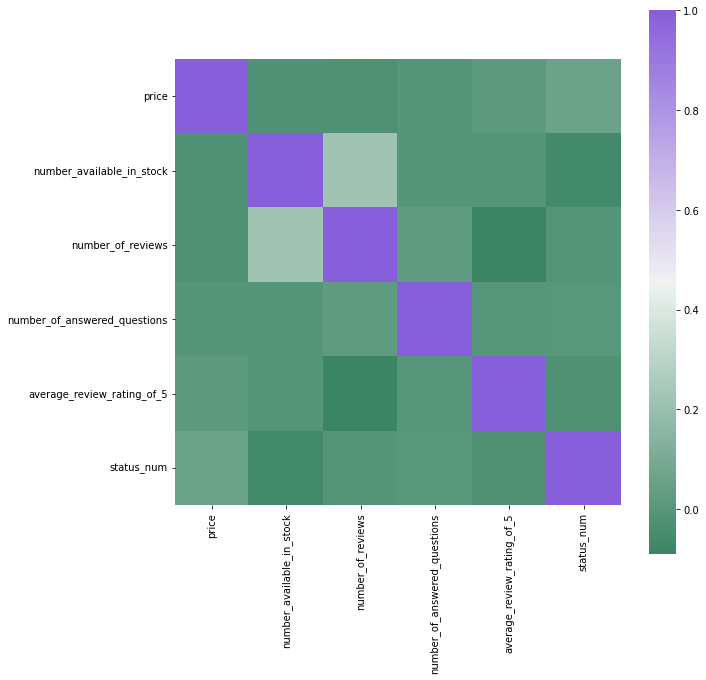

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(150, 275, as_cmap = True), square = True, ax = ax)

In [ ]:
dfTrain = amazon3[:2000]
dfTest = amazon3[2000:4000]
dfCheck = amazon3[4000:]

In [ ]:
train_y = np.asarray(dfTrain['number_of_reviews']) # We store insuranceclaim in train_y, but as numpy array
train_x = np.asarray(dfTrain.drop('number_of_reviews',1)) # We remove insurancelcaim from the predictors (because it's the output variable)
test_y = np.asarray(dfTest['number_of_reviews']) # See the comments above
test_x = np.asarray(dfTest.drop('number_of_reviews',1))
train_x 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


array([[ 0.29,  3.  ,  2.  ,  4.  ,  1.  ],
       [ 0.38,  2.  ,  1.  ,  4.5 ,  1.  ],
       [ 0.39,  7.  ,  1.  ,  4.5 ,  1.  ],
       ...,
       [ 6.99,  9.  ,  1.  ,  5.  ,  1.  ],
       [ 7.  , 10.  ,  1.  ,  4.8 ,  1.  ],
       [ 7.  ,  2.  ,  1.  ,  5.  ,  1.  ]])

In [ ]:
means = np.mean(train_x, axis=0)
std = np.std(train_x, axis=0)
 
train_x = (train_x - means)/std
test_x = (test_x - means)/std

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
accuracy = model.score(test_x, test_y)
print("accuracy = ", accuracy * 100, "%")

accuracy =  35.949999999999996 %


In [ ]:
pred = model.predict(test_x)
print(pred)

[  1   1   1 ...   1   1 690]


In [ ]:
realvsmodel = pd.DataFrame(pred,test_y)
realvsmodel = pd.DataFrame({'predicted':pred,'original':test_y})
realvsmodel.head(25)

,predicted,original
0,1,1
1,1,6
2,1,1
3,1,6
4,1,2
5,1,3
6,1,30
7,1,1
8,1,3
9,1,4


In [ ]:
corr = amazon.corr()
corr

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating_of_5
price,1.000000,-0.018077,-0.024214,-0.005956,0.013431
number_available_in_stock,-0.018077,1.000000,0.216765,-0.008131,-0.010505
number_of_reviews,-0.024214,0.216765,1.000000,0.020981,-0.090466
number_of_answered_questions,-0.005956,-0.008131,0.020981,1.000000,0.001997
average_review_rating_of_5,0.013431,-0.010505,-0.090466,0.001997,1.000000


In [ ]:
bins = np.linspace(amazon.average_review_rating_of_5.min(), amazon.average_review_rating_of_5.max(), 3) 
# Define the two labels. 
labels = ['Low Rating', 'High Rating']  
# Add bins to the dataset. 
amazon['bins'] = pd.cut(amazon['average_review_rating_of_5'], bins = bins, labels = labels, include_lowest = True) 
amazon

,uniq_id,product_name,manufacturer,price,number_available_in_stock,status,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,bins
0,dafc6b4ba4b4a3e7b4ff83402a196ae8,Dinosaur Eggs,Halsall,0.29,3,new,3,2,4.0,Figures & Playsets > Dinosaurs,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,Manufacturer's Description not available,Technical Details Item Weight82 g Product Dime...,Not available,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,None,Fascinating fun // 4.0 // 25 Nov. 2008 // By\n...,High Rating
1,ba85fb9368114fce646379ed12750a5f,Neopets 4 Trading Card Fun Packs (2 Bonus Cards),Neopets,0.38,2,new,2,1,4.5,Hobbies > Trading Cards & Accessories > Packs ...,Unknown,Manufacturer's Description not available,Technical Details Item Weight454 g Product Dim...,Not available,Not available,None,Never Too Old // 4.0 // 6 Nov. 2013 // By\n ...,High Rating
2,14e24c29ba38c2717754baa2638f242a,"Latex Assorted Water Balloons, Pack of 40",Unique Party,0.39,7,new,2,1,4.5,Party Supplies > Decorations > Balloons,http://www.amazon.co.uk/Latex-Cannonball | htt...,Colour Name:Assorted Bold | Size Name:Pack o...,Technical Details Item Weight222 g Product Dim...,Colour Name:Assorted Bold | Size Name:Pack o...,http://www.amazon.co.uk/Water-Bombs-Pack-100-A...,None,Great item // 4.0 // 27 Dec. 2015 // By\n \...,High Rating
3,048d64d2ba61c23f6280663a7281ff19,iCarly Shopper Bag - Lilac and Pink,Trade Mark Collections,0.50,4,new,7,2,4.6,Sports Toys & Outdoor > Beach Toys > Airbeds &...,http://www.amazon.co.uk/iCarly-Large-Rectangle...,Manufacturer's Description The iCarly Shopping...,NaN,Manufacturer's Description The iCarly Shopping...,http://www.amazon.co.uk/Namco-Bandai-Icarly/dp...,None,Very good product // 5.0 // 26 Mar. 2014 // By...,High Rating
4,7b72f597db5d74d35c4f91ef69708cf1,4 Packs of Mini Colouring Pencils (4 pencils i...,unisex party bag fillers,0.60,7,new,21,1,4.3,Arts & Crafts > Colouring Pencils,http://www.amazon.co.uk/12-Mini-Christmas-Colo...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,Technical Details Item Weight59 g Product Dime...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,http://www.amazon.co.uk/20-Packs-Wax-Crayons-P...,How many packs in the box. // I got four Mimi ...,Well made and presented // 4.0 // 6 April 2015...,High Rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6331,8020c8cd2b86bd2e793241dd321d8921,Parrot Bebop Drone 2 (White),Parrot,439.95,11,new,9,3,3.3,Hobbies > Remote Controlled Devices > Helicopt...,http://www.amazon.co.uk/BTG-Upgrade-Battery310...,Colour Name:White and Black Product Descriptio...,Technical Details Item Weight503 g Product Dim...,Colour Name:White and Black Product Descriptio...,Not available,Can you use the skycontroller from the origina...,Much improved but slightly weird incremental u...,High Rating
6332,ddd1807f90417adcdf4cd45841239e01,Star Images E.T. Stunt Puppet Replica Action F...,Star images,447.99,3,new,1,3,5.0,Figures & Playsets > Accessories,http://www.amazon.co.uk/12-Inch-Replica-Stunt-...,Product Description E.T. Stunt Puppet Replica ...,Technical Details Item Weight998 g Product Dim...,Product Description E.T. Stunt Puppet Replica ...,http://www.amazon.co.uk/12-Inch-Replica-Stunt-...,Is this made by Neca and is it the 3 foot life...,Five Stars // 5.0 // 25 Oct. 2014 // By\n \...,High Rating
6333,1e897bf37e4e89aba7cc962f24913fd4,Indiana Jones - 12 Inch Action Figures: Indian...,Sideshow,719.95,2,new,1,1,5.0,Figures & Playsets > Science Fiction & Fantasy,http://www.amazon.co.uk/Indiana-Jones-Masterpi...,Figurine articulÃ©e taille env. 30 cm avec vÃª...,Technical Details Item Weight1.1 Kg Product Di...,Figurine articulÃ©e taille env. 30 cm avec vÃª...,Not available,None,"""It's not the years, sweet 